# Delay by airline consistency across airports:
### Should we have separate models for each airport?

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

In [2]:
import util

In [3]:
import imp
imp.reload(util)

<module 'util' from '/gh/flightdelay/nbsc/util.py'>

# Load data

In [5]:
df_al, df_ap, df_fl = util.load_data()

In [ ]:
df_fl = df_fl[['ORIGIN_AIRPORT','AIRLINE','DEPARTURE_DELAY']]

In [6]:
# Remove cancelled flights
df_fl = df_fl[np.isfinite(df_fl['DEPARTURE_DELAY'])]

# Separate flights by airport

In [7]:
df_fl_byap = df_fl.groupby(['ORIGIN_AIRPORT','AIRLINE'])

In [8]:
df_fl_byap_mean = df_fl_byap.apply(np.mean)

In [14]:
df_fl_byap_mean.head()

Unnamed: 0  Unnamed: 0.1    YEAR     MONTH  \
ORIGIN_AIRPORT AIRLINE                                                 
ABE            DL       2.937926e+06  2.937926e+06  2015.0  6.601770   
               EV       3.019605e+06  3.019605e+06  2015.0  6.746763   
               OO       1.670404e+06  1.670404e+06  2015.0  4.058824   
ABI            MQ       2.839511e+06  2.839511e+06  2015.0  6.388066   
ABQ            AA       2.995470e+06  2.995470e+06  2015.0  6.704681   

                              DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
ORIGIN_AIRPORT AIRLINE                                          
ABE            DL       15.495575     3.917404    2211.274336   
               EV       15.768345     3.741487    5354.864269   
               OO       15.470588     4.117647    4648.470588   
ABI            MQ       15.625103     3.926337    3301.249794   
ABQ            AA       15.624502     3.979582    1525.617032   

                        SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
ORIGIN_AIRPORT AIRLINE                                                         
ABE            DL                631.660767      629.536873         2.831858   
               EV               1221.510791     1224.690647        10.009592   
               OO               1596.078431     1573.862745         3.666667   
ABI            MQ               1094.657613     1103.250617         5.646502   
ABQ            AA               1096.636952     1101.768924         8.359064   

                            ...        SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
ORIGIN_AIRPORT AIRLINE      ...                                          
ABE            DL           ...               846.634218    838.525074   
               EV           ...              1381.110791   1390.835334   
               OO           ...              1803.725490   1812.647059   
ABI            MQ           ...              1191.491770   1192.409316   
ABQ            AA           ...              1376.980578   1377.565586   

                        ARRIVAL_DELAY  DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  \
ORIGIN_AIRPORT AIRLINE                                                         
ABE            DL           -2.563422  0.000000   0.000000         20.787879   
               EV            7.636495  0.003357   0.000480         17.774684   
               OO            9.900000  0.019608   0.000000         13.357143   
ABI            MQ            2.536938  0.001235   0.001646         11.589474   
ABQ            AA            6.535500  0.002490   0.001494         13.597484   

                        SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
ORIGIN_AIRPORT AIRLINE                                                       
ABE            DL             0.000000      33.060606             0.000000   
               EV             0.000000      22.207595            30.220253   
               OO             0.000000       0.857143            21.500000   
ABI            MQ             0.121053      24.181579            19.784211   
ABQ            AA             0.000000      36.386792            23.949686   

                        WEATHER_DELAY  
ORIGIN_AIRPORT AIRLINE                 
ABE            DL            3.545455  
               EV            0.600000  
               OO            0.071429  
ABI            MQ           13.697368  
ABQ            AA            6.540881  

[5 rows x 28 columns]

# Plot Delay by airline for a few airports

In [29]:
df_fl_byap_mean

ORIGIN_AIRPORT  AIRLINE
ABE             DL          2.831858
                EV         10.009592
                OO          3.666667
ABI             MQ          5.646502
ABQ             AA          8.359064
                AS         -6.709589
                B6         16.130435
                DL          4.623293
                EV          5.909756
                MQ         11.933981
                OO          4.518698
                UA         10.743304
                US          2.187500
                WN         10.536032
ABR             OO          9.281037
ABY             EV          8.860587
ACK             B6         16.741245
ACT             EV          6.324464
                MQ          7.276392
ACV             OO         12.035997
ACY             NK          9.291347
ADK             AS         11.295918
ADQ             AS          0.268817
AEX             EV          7.906062
                MQ         10.852768
AGS             DL          5.888889
              

In [12]:
df_fl_byap_mean.loc['SAN']['DEPARTURE_DELAY']

AIRLINE
AA     5.890003
AS    -1.455405
B6    13.685063
DL     2.752950
F9     3.222615
HA     3.756164
NK     7.497998
OO     6.281919
UA    10.266905
US     3.031690
VX    11.368559
WN    10.818552
Name: DEPARTURE_DELAY, dtype: float64

In [19]:
# Unique airports (consistent with df_ap)
all_airports = df_fl_byap_mean.index.levels[0]
# Unique airlines (consistent with df_al)
all_airlines = df_fl_byap_mean.index.levels[1]

In [27]:
df_fl_byap_mean.loc['SAN'].loc['AA']['DEPARTURE_DELAY']

5.890002784739627

In [35]:
df_fl_byap_mean[['SAN','LAX']]

ORIGIN_AIRPORT  AIRLINE
SAN             AA          5.890003
                AS         -1.455405
                B6         13.685063
                DL          2.752950
                F9          3.222615
                HA          3.756164
                NK          7.497998
                OO          6.281919
                UA         10.266905
                US          3.031690
                VX         11.368559
                WN         10.818552
LAX             AA          6.734932
                AS          0.632084
                B6         12.054558
                DL          9.946523
                F9         10.178595
                HA          2.949284
                MQ         22.590643
                NK         21.206615
                OO          8.887004
                UA         12.776143
                US          4.545206
                VX          9.570629
                WN         14.492596
Name: DEPARTURE_DELAY, dtype: float64

In [59]:
df_fl_byap_mean['SAN'].to_dict()['AA']

5.890002784739627

In [52]:
df_fl_byap_mean.index

1305

In [87]:
# Compare 2 airlines across all airports
from collections import defaultdict
als = ['AA','US']
delay_by_ap = defaultdict(list)
delay_by_ap_aps = []
for p in all_airports:
    if als[0] in df_fl_byap_mean[p].to_dict().keys() and als[1] in df_fl_byap_mean[p].to_dict().keys():
        delay_by_ap_aps.append(p)
        for a in als:
            delay_by_ap[a].append(df_fl_byap_mean[p].to_dict()[a])

(0.10426011185513476, 0.36685650552222993)
SAN : AA 5.89000278474 US 3.03169014085
LGA : AA 6.40613745879 US 6.9250169262
JFK : AA 10.6862231223 US 15.0080763583
TUS : AA 4.90842245989 US 23.0
ANC : AA 18.504950495 US 1.93865030675


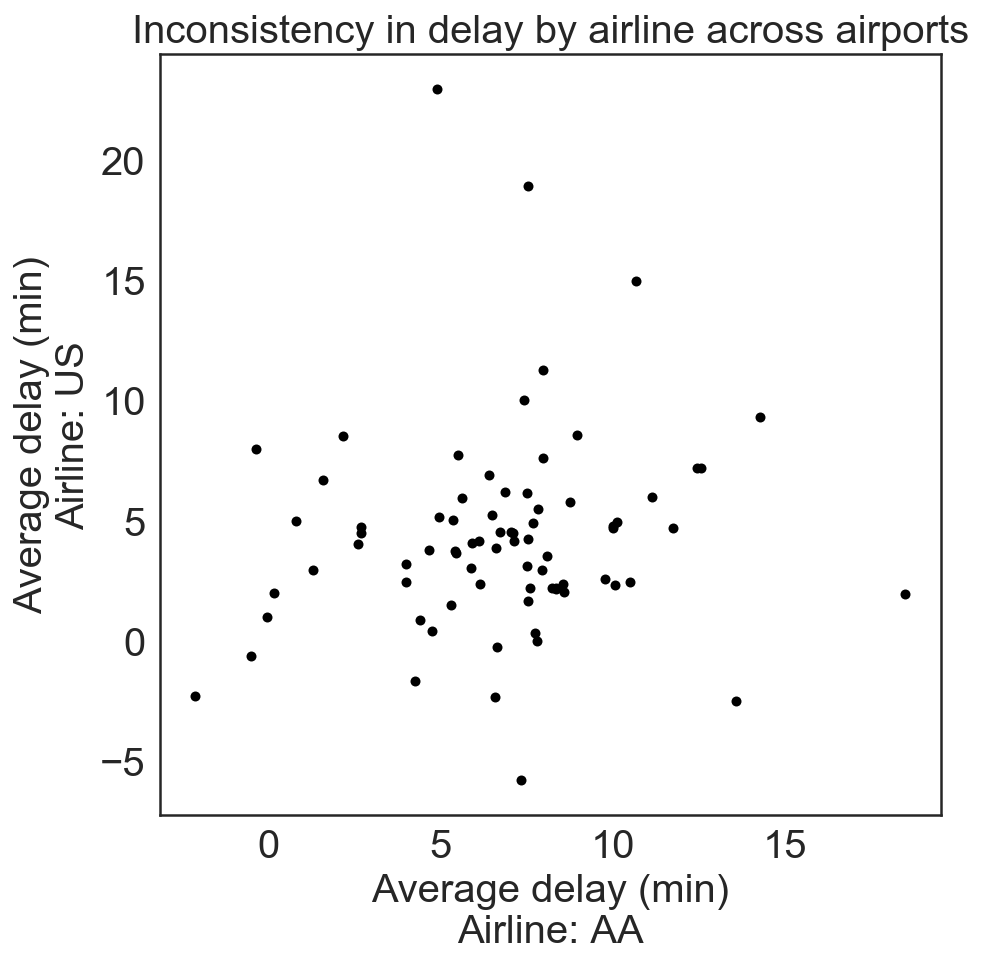

In [91]:
# Make scatter plot
N_ap = len(delay_by_ap[als[0]])
plt.figure(figsize=(7,7))
plt.plot(delay_by_ap[als[0]], delay_by_ap[als[1]], 'k.', ms=10)
print(sp.stats.pearsonr(delay_by_ap[als[0]], delay_by_ap[als[1]]))
plt.xlabel('Average delay (min)\nAirline: '+als[0],size=20)
plt.ylabel('Average delay (min)\nAirline: '+als[1],size=20)
plt.title('Inconsistency in delay by airline across airports',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
ap = 'SAN'
print(ap,':',als[0], df_fl_byap_mean[ap][als[0]], als[1], df_fl_byap_mean[ap][als[1]])
ap = 'LGA'
print(ap,':',als[0], df_fl_byap_mean[ap][als[0]], als[1], df_fl_byap_mean[ap][als[1]])
ap = 'JFK'
print(ap,':',als[0], df_fl_byap_mean[ap][als[0]], als[1], df_fl_byap_mean[ap][als[1]])
ap = 'TUS'
print(ap,':',als[0], df_fl_byap_mean[ap][als[0]], als[1], df_fl_byap_mean[ap][als[1]])
ap = 'ANC'
print(ap,':',als[0], df_fl_byap_mean[ap][als[0]], als[1], df_fl_byap_mean[ap][als[1]])